In [1]:
from sklearn.decomposition import PCA
from pandas import DataFrame
import gensim.downloader as api
import matplotlib.pyplot as plt
import numpy as np

In [2]:
def show_DataFrame(dic, index):
    return DataFrame(dic, index=index).applymap(lambda x: (x[0], round(x[1], 2))).T.fillna(0)

In [3]:
def plot_scatter(prjected_words_vectors, words, colors):
    plt.figure(figsize=(15,10))
    plt.scatter(prjected_words_vectors[:,0], prjected_words_vectors[:,1], linewidths=2, color=colors)
    for i, word in enumerate(words):
        plt.annotate(word, xy=(prjected_words_vectors[i,0]-0.1, prjected_words_vectors[i,1]+0.08))

In [4]:
wv_from_bin = api.load("glove-wiki-gigaword-200")

[==================================================] 100.0% 252.1/252.1MB downloaded



# Question 1

In [5]:
words = ['bear', 'drug', 'messi', 'italy', 'japan', 'vikings', 'mother', 'hardy', 'peach', 'breaking']    # Question 1

similar_words = dict()
for word in words:
    similar_words[word] = sorted(wv_from_bin.most_similar(word), key=lambda item: item[1], reverse=True)

show_DataFrame(similar_words, [f'Word {i + 1}' for i in range(10)])

,Word 1,Word 2,Word 3,Word 4,Word 5,Word 6,Word 7,Word 8,Word 9,Word 10
bear,"(bears, 0.68)","(grizzly, 0.6)","(wolf, 0.59)","(stearns, 0.57)","(lion, 0.54)","(bearing, 0.51)","(dog, 0.51)","(big, 0.49)","(bore, 0.49)","(deer, 0.49)"
drug,"(drugs, 0.87)","(cocaine, 0.7)","(trafficking, 0.67)","(traffickers, 0.65)","(narcotics, 0.65)","(heroin, 0.64)","(addiction, 0.6)","(prescription, 0.6)","(medication, 0.59)","(marijuana, 0.59)"
messi,"(ronaldinho, 0.76)","(eto'o, 0.74)","(iniesta, 0.71)","(xavi, 0.69)","(ronaldo, 0.69)","(tevez, 0.67)","(barca, 0.64)","(saviola, 0.63)","(ibrahimovic, 0.63)","(riquelme, 0.61)"
italy,"(italian, 0.77)","(rome, 0.63)","(spain, 0.62)","(italians, 0.62)","(germany, 0.61)","(france, 0.59)","(greece, 0.58)","(portugal, 0.57)","(europe, 0.56)","(austria, 0.56)"
japan,"(japanese, 0.8)","(tokyo, 0.72)","(korea, 0.66)","(china, 0.63)","(asia, 0.57)","(asian, 0.55)","(thailand, 0.54)","(osaka, 0.54)","(hashimoto, 0.54)","(indonesia, 0.53)"
vikings,"(seahawks, 0.74)","(packers, 0.72)","(buccaneers, 0.7)","(raiders, 0.7)","(redskins, 0.68)","(ravens, 0.66)","(broncos, 0.66)","(steelers, 0.65)","(rams, 0.64)","(49ers, 0.64)"
mother,"(daughter, 0.86)","(wife, 0.86)","(grandmother, 0.84)","(husband, 0.81)","(sister, 0.8)","(father, 0.79)","(her, 0.78)","(daughters, 0.76)","(woman, 0.76)","(she, 0.75)"
hardy,"(nickerson, 0.48)","(amies, 0.47)","(bloom, 0.46)","(jessica, 0.46)","(laurel, 0.46)","(brl, 0.45)","(moore, 0.45)","(perennials, 0.44)","(vines, 0.44)","(holzman, 0.43)"
peach,"(apricot, 0.68)","(pear, 0.63)","(mango, 0.61)","(cherry, 0.61)","(raspberry, 0.6)","(blossom, 0.6)","(plum, 0.6)","(cobbler, 0.58)","(pecan, 0.58)","(nectarine, 0.57)"
breaking,"(break, 0.79)","(broke, 0.75)","(broken, 0.7)","(breaks, 0.63)","(before, 0.58)","(putting, 0.58)","(set, 0.58)","(apart, 0.57)","(throwing, 0.57)","(start, 0.57)"


# Question 2

In [6]:
words_groups = [['brother',        'sister',         'brazil' ],       # Question 2
                ['lion',        'tiger',         'dad' ],
                ['zidane',        'real',         'parrot' ],
                ['volleyball',        'basketball',         'king' ],
                ['cillian',        'murphy',         'rainy' ]]


distances = dict()
for w1, w2, w3 in words_groups:
    distances[w1] = [(w2, wv_from_bin.distance(w1, w2)), (w3, wv_from_bin.distance(w1, w3))]

show_DataFrame(distances, ['Near Word', 'Far Word'])

,Near Word,Far Word
brother,"(sister, 0.38)","(brazil, 0.83)"
lion,"(tiger, 0.53)","(dad, 0.85)"
zidane,"(real, 0.73)","(parrot, 0.92)"
volleyball,"(basketball, 0.3)","(king, 0.97)"
cillian,"(murphy, 0.52)","(rainy, 1.09)"


# Question 3

In [7]:
words_groups = [['king',        'woman',    'man' ],
                ['actor',       'girl',     'boy' ],
                ['doctor',      'she',      'he'  ],
                ['homemaker',   'she',      'he'  ],
                ['football',    'woman',    'man' ]]


first_distances = dict()
second_distances = dict()
for w1, w2, w3 in words_groups:
    first_distances[str((w1, w2, w3))] = sorted(wv_from_bin.most_similar(positive=[w1, w2], negative=[w3]), key=lambda item: item[1], reverse=True)
    second_distances[str((w1, w2, w3))] = sorted(wv_from_bin.most_similar(positive=[w1, w3], negative=[w2]), key=lambda item: item[1], reverse=True)

In [8]:
show_DataFrame(first_distances, [f'Word {i + 1}' for i in range(10)])

,Word 1,Word 2,Word 3,Word 4,Word 5,Word 6,Word 7,Word 8,Word 9,Word 10
"('king', 'woman', 'man')","(queen, 0.7)","(princess, 0.61)","(monarch, 0.59)","(throne, 0.58)","(prince, 0.58)","(elizabeth, 0.55)","(daughter, 0.54)","(kingdom, 0.53)","(mother, 0.52)","(crown, 0.52)"
"('actor', 'girl', 'boy')","(actress, 0.87)","(starring, 0.71)","(actresses, 0.69)","(actors, 0.69)","(starred, 0.68)","(screenwriter, 0.63)","(comedian, 0.63)","(film, 0.61)","(movie, 0.6)","(filmmaker, 0.58)"
"('doctor', 'she', 'he')","(nurse, 0.7)","(mother, 0.6)","(woman, 0.6)","(her, 0.59)","(physician, 0.57)","(pregnant, 0.57)","(dr., 0.56)","(doctors, 0.56)","(patient, 0.55)","(hospital, 0.55)"
"('homemaker', 'she', 'he')","(housewife, 0.71)","(schoolteacher, 0.61)","(widowed, 0.55)","(businesswoman, 0.55)","(mom, 0.55)","(waitress, 0.53)","(hairdresser, 0.53)","(mother, 0.52)","(socialite, 0.52)","(grandmother, 0.51)"
"('football', 'woman', 'man')","(basketball, 0.67)","(soccer, 0.64)","(volleyball, 0.58)","(league, 0.55)","(softball, 0.55)","(hockey, 0.54)","(rugby, 0.53)","(ncaa, 0.52)","(club, 0.52)","(collegiate, 0.52)"


In [9]:
show_DataFrame(second_distances, [f'Word {i + 1}' for i in range(10)])

,Word 1,Word 2,Word 3,Word 4,Word 5,Word 6,Word 7,Word 8,Word 9,Word 10
"('king', 'woman', 'man')","(prince, 0.55)","(ii, 0.54)","(brother, 0.54)","(iii, 0.53)","(reign, 0.53)","(uncle, 0.52)","(kingdom, 0.5)","(henry, 0.5)","(kings, 0.5)","(iv, 0.48)"
"('actor', 'girl', 'boy')","(comedian, 0.61)","(starring, 0.6)","(actors, 0.58)","(starred, 0.56)","(movie, 0.55)","(brother, 0.55)","(father, 0.55)","(film, 0.53)","(musician, 0.53)","(filmmaker, 0.52)"
"('doctor', 'she', 'he')","(physician, 0.66)","(surgeon, 0.57)","(doctors, 0.57)","(medical, 0.56)","(him, 0.54)","(dr., 0.54)","(himself, 0.53)","(his, 0.52)","(hospital, 0.52)","(man, 0.51)"
"('homemaker', 'she', 'he')","(43-year, 0.59)","(schoolteacher, 0.59)","(42-year, 0.55)","(housewife, 0.55)","(55-year, 0.54)","(48-year, 0.53)","(bricklayer, 0.53)","(47-year, 0.52)","(44-year, 0.52)","(39-year, 0.52)"
"('football', 'woman', 'man')","(soccer, 0.68)","(baseball, 0.64)","(team, 0.63)","(basketball, 0.62)","(league, 0.62)","(players, 0.61)","(rugby, 0.61)","(club, 0.6)","(game, 0.58)","(hockey, 0.58)"


# Question 4

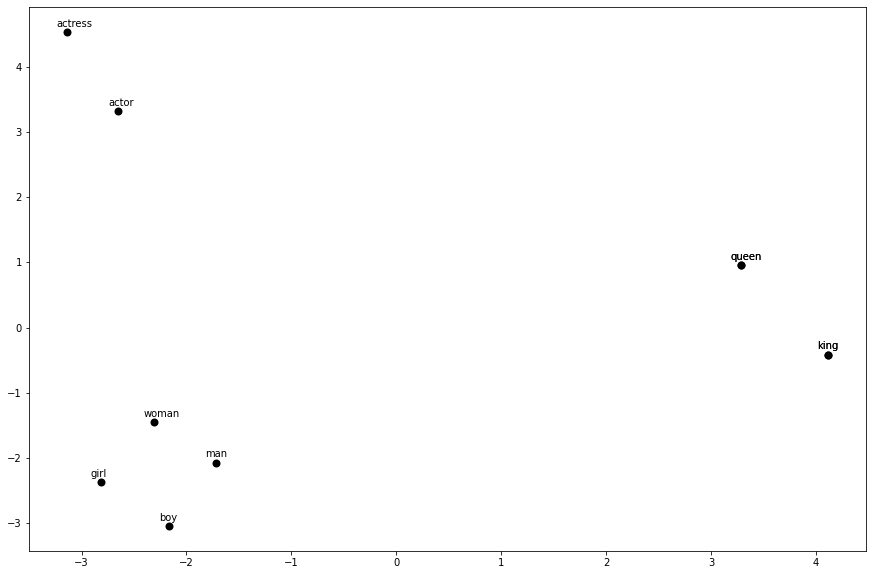

In [28]:
words = ['woman', 'man', 'king', 'queen', 'boy', 'girl', 'actor', 'actress', 'king', 'queen']
words_vectors = [wv_from_bin.get_vector(word) for word in words]

pca = PCA(n_components=3)
prjected_words_vectors = pca.fit_transform(words_vectors)

plot_scatter(prjected_words_vectors, words, 'black')

# Question 5

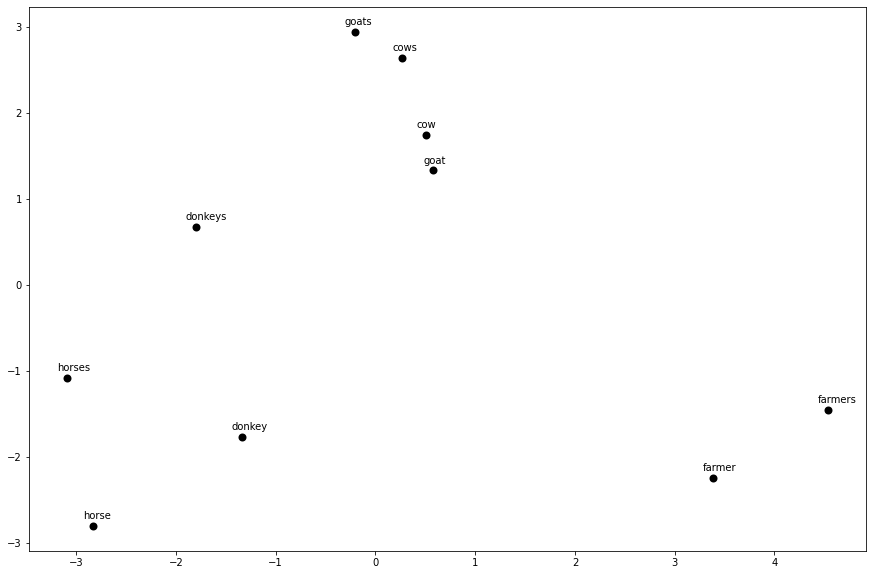

In [21]:
# Question 5
words = ['cow', 'cows', 'horse', 'horses', 'donkey', 'donkeys', 'goat', 'goats', 'farmer', 'farmers']
words_vectors = [wv_from_bin.get_vector(word) for word in words]

pca = PCA(n_components=3)
prjected_words_vectors = pca.fit_transform(words_vectors)

plot_scatter(prjected_words_vectors, words, 'black')

# Question 6

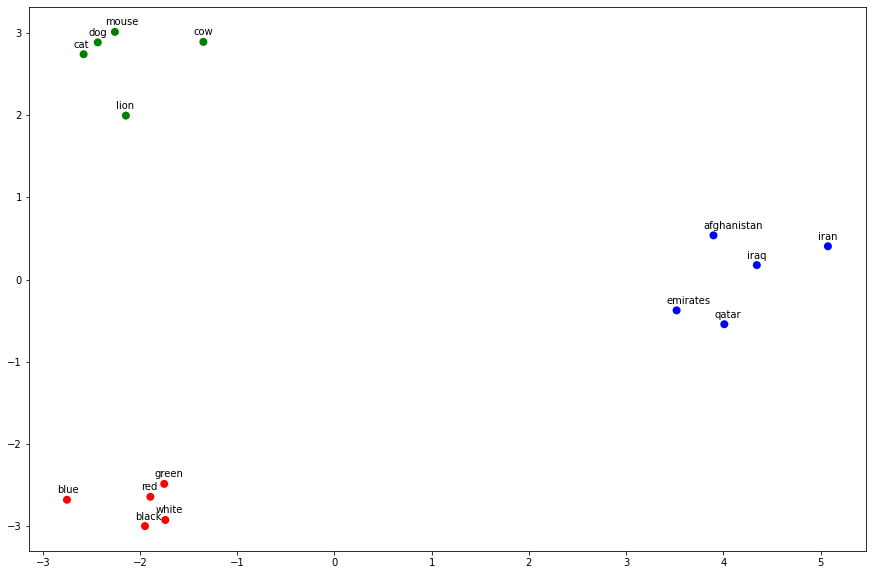

In [12]:
words_group1 = ['cat', 'dog', 'mouse', 'cow', 'lion']
words_group2 = ['iran', 'iraq', 'qatar', 'emirates', 'afghanistan']
words_group3 = ['green', 'blue', 'red', 'white', 'black']

words_group1_vectors = [wv_from_bin.get_vector(word) for word in words_group1]
words_group2_vectors = [wv_from_bin.get_vector(word) for word in words_group2]
words_group3_vectors = [wv_from_bin.get_vector(word) for word in words_group3]

words = np.array(words_group1 + words_group2 + words_group3)
colors = ['green']*len(words_group1) + ['blue']*len(words_group2) + ['red']*len(words_group3)
words_vectors = np.array(words_group1_vectors + words_group2_vectors + words_group3_vectors)

pca = PCA(n_components=3)
prjected_words_vectors = pca.fit_transform(words_vectors)

plot_scatter(prjected_words_vectors, words, colors)

# Question 7

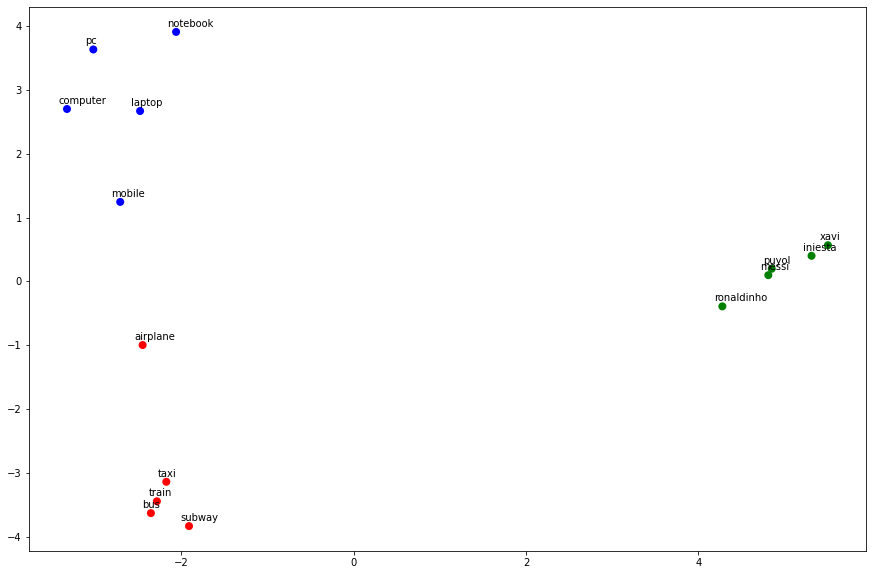

In [31]:
# Question 7
words_group1 = ['messi', 'xavi', 'iniesta', 'ronaldinho', 'puyol']
words_group2 = ['mobile', 'computer', 'laptop', 'notebook', 'pc']
words_group3 = ['airplane', 'train', 'taxi', 'bus', 'subway']

words_group1_vectors = [wv_from_bin.get_vector(word) for word in words_group1]
words_group2_vectors = [wv_from_bin.get_vector(word) for word in words_group2]
words_group3_vectors = [wv_from_bin.get_vector(word) for word in words_group3]

words = np.array(words_group1 + words_group2 + words_group3)
colors = ['green']*len(words_group1) + ['blue']*len(words_group2) + ['red']*len(words_group3)
words_vectors = np.array(words_group1_vectors + words_group2_vectors + words_group3_vectors)

pca = PCA(n_components=3)
prjected_words_vectors = pca.fit_transform(words_vectors)

plot_scatter(prjected_words_vectors, words, colors)

# Question 8

In [32]:
many_dict = dict()
many_dict[str(('many', 'cow', 'one'))] = wv_from_bin.most_similar(positive=['many', 'cow'], negative=['one'])
show_DataFrame(many_dict, [f'Word {i + 1}' for i in range(10)])

,Word 1,Word 2,Word 3,Word 4,Word 5,Word 6,Word 7,Word 8,Word 9,Word 10
"('many', 'cow', 'one')","(cows, 0.64)","(cattle, 0.56)","(mad, 0.56)","(sheep, 0.56)","(pigs, 0.56)","(bovine, 0.56)","(herds, 0.56)","(beef, 0.53)","(chickens, 0.52)","(bse, 0.5)"


In [33]:
many_dict = dict()
many_dict[str(('young', 'cow', 'old'))] = wv_from_bin.most_similar(positive=['young', 'cow'], negative=['old'])
show_DataFrame(many_dict, [f'Word {i + 1}' for i in range(10)])

,Word 1,Word 2,Word 3,Word 4,Word 5,Word 6,Word 7,Word 8,Word 9,Word 10
"('young', 'cow', 'old')","(mad, 0.6)","(cows, 0.58)","(sheep, 0.52)","(pigs, 0.52)","(herd, 0.51)","(bovine, 0.5)","(cattle, 0.49)","(infected, 0.48)","(spongiform, 0.48)","(animals, 0.48)"


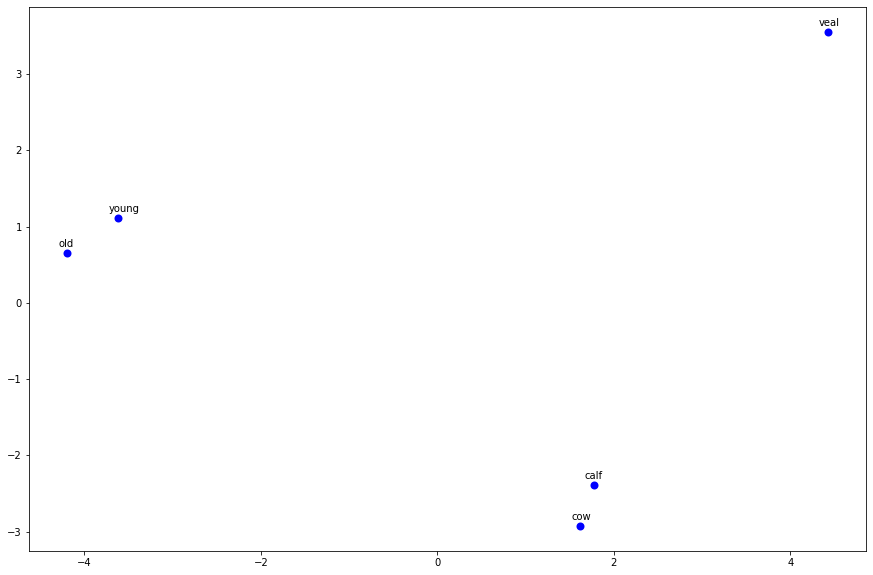

In [41]:
# Question 8
words = ['old', 'young', 'cow', 'veal', 'calf']
words_vectors = [wv_from_bin.get_vector(word) for word in words]

pca = PCA(n_components=3)
prjected_words_vectors = pca.fit_transform(words_vectors)

plot_scatter(prjected_words_vectors, words, 'blue')